# Boxplots

## 1. History of Boxplots
The boxplot was introduced by mathematician John Tukey [1], in 1970 when he developed his toolkit for exploratory data analysis [2].

To give the tool it's full title, it is called a Box and Whiskers plot. Below is a diagram displaying all of the main components of a box and whisker plot [3].

![title](img/bplot_1.png)

The boxplot is an easily interpreted, visual method for representing the distribution of numerical data, using quartiles as a measure.
You will notice that the boxplot image above is made up of the following:
- a continuous vertical line, which represents the majority spread of the data set, with the lower and upper extremes of the data marked on either end.
- a box that is intersected by the data line. This box can appear in different places along the data line. It can also be of varying length. These all depend on the quartile values of the dataset. Where the lowest point on the data line represents the low end of the data, then the lowest edge of the box represents the lower (first) quartile value of the set (Denoted by 'Q1' on the diagram). Similarly, the uppermost edge of the box represents the upper (third) quartile value of the set (Denoted by 'Q3').
- within the box, there is a horizontal line, which represents the median (2nd quartile), or halfway value of the data set. This is denoted on the diagram by 'M'. Again, this can appear at various positions inside the box, depending on whether the data is skewed one way or the other.
- Finally, the individual dots on either end represent outlier data points within the set

### Outliers
So how do we identify outlier data versus data that is included as part of the main set, denoted by the continuous line? We need to calculate the Inter-quartile Range (IQR), which is the difference bewteen the upper and lower quartiles.
We then measure any data points that are more than 1.5 times the IQR away from either the lower or upper extremes of the box & whiskers plot. These values are outliers and are denoted by single points on the plot.

## 2. Uses of Boxplots
Boxplots are useful in comparing multiple sets of similar data, such as performance of multiple classes in an end of year maths exam.
From the plot, it is very easy to see the actual quartile values, the extreme values and any outlying data points [4].

## 3. Demonstration
Taking a large (> 30 datapoints) sample of normally distributed data, the empirical rule states that ~97% of the dataset will fall within +/- 3 standard deviations from the mean. This suggests that we should see some outlier data that will be shown on a box & whiskers plot.

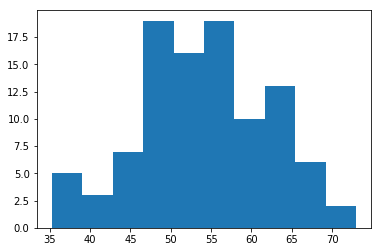

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mean, std_dev, class_size = 55, 8.5, 100
sample = np.random.normal(mean, std_dev, class_size)

plt.hist(sample)
plt.show()

Above, we have generated a normally distributed sample of 100 student grades for an end of year Maths exam. The grades have a mean value of 55 marks, with a standard deviation of 7.5 marks. If we calculate the lower quartile (LQ), median and upper quartile (UQ) of the set, we get the below array of values:

In [3]:
quartiles = [np.quantile(sample, 0.25), np.median(sample), np.quantile(sample, 0.75)]
quartiles

[49.07590895411893, 54.10850865389145, 60.048499426665686]

Next, we should claculate the IQR of the dataset, by subtracting LQ from UQ:

In [4]:
iqr = quartiles[2] - quartiles[0]
iqr

10.972590472546756

Following on, just to verify that we should see some outliers in our boxplot, for demonstration purposes, we will calculate the extreme values of our dataset. From earlier, these values are within 1.5 times the IQR of both the lower and upper extremes.

In [5]:
extrema = [quartiles[0] - (iqr*3)/2, quartiles[2] + (iqr*3)/2]
extrema

[32.617023245298796, 76.50738513548582]

Finally, if we find the minimum and maximum grades achieved within the entire set, we can see that there is at least one grade below the lower extreme and at least one grade above the upper extreme:

In [6]:
max_min = [sample.min(), sample.max()]
max_min

[35.25596539509422, 72.97758442414363]

{'whiskers': [<matplotlib.lines.Line2D at 0x11acafc50>,
 'caps': [<matplotlib.lines.Line2D at 0x11acb9320>,
 'boxes': [<matplotlib.lines.Line2D at 0x11acaf828>],
 'medians': [<matplotlib.lines.Line2D at 0x11acb99b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11acb9cf8>],
 'means': []}

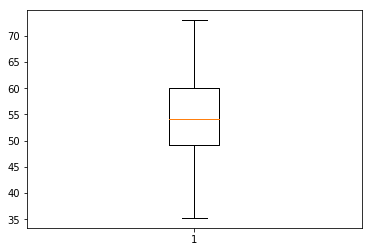

In [7]:
plt.boxplot(sample)

Now if I had multiple classes completing the same exam and I wanted to compare the results, class by class, the box plot is ideal for this type of quick analysis. First I will generate 3 more samples of class grades for the exam.

In [8]:
mean_1, std_dev_1, class_size_1 = 45, 3.0, 100
sample_1 = np.random.normal(mean_1, std_dev_1, class_size_1)

mean_2, std_dev_2, class_size_2 = 60, 5, 100
sample_2 = np.random.normal(mean_2, std_dev_2, class_size_2)

mean_3, std_dev_3, class_size_3 = 59, 3.2, 100
sample_3 = np.random.normal(mean_3, std_dev_3, class_size_3)

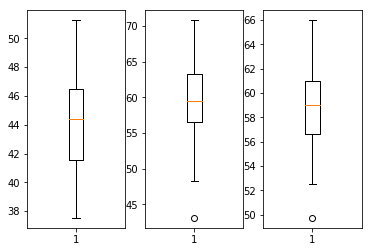

In [9]:
plt.subplot(1, 3, 1)
plt.boxplot(sample_1)

plt.subplot(1, 3, 2)
plt.boxplot(sample_2)

plt.subplot(1, 3, 3)
plt.boxplot(sample_3)

plt.show()

In each of the three boxplots above, we can see the differences in the size of the box, depending on the std deviation from the mean. The y-axis for each plot varies depending on the mean itself and the appearance of outliers is subject to the random selection of data in each case.

## 4. Alternatives to the Boxplot
Some alternatives to box-and-whisker plots are:
- violin plot

/Users/Robbie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


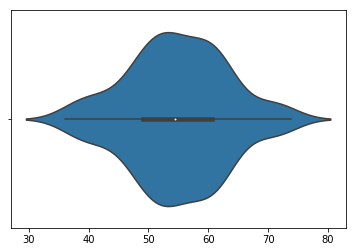

In [12]:
import seaborn as sns

sns.violinplot(sample)

## 5. References

### 1. http://vita.had.co.nz/papers/boxplots.pdf
### 2. J. W. Tukey. Exploratory Data Analysis. Addison–Wesley, preliminary edition, 1970.
### 3. http://mathworld.wolfram.com/Box-and-WhiskerPlot.html
### 4. https://chartio.com/resources/tutorials/what-is-a-box-plot/